In [6]:
import os
import sys
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [ ]:
os.chdir("/cellar/users/aklie/projects/igvf/topic_grn_links/external/igvf_annual_meetings/2023")

In [20]:
#adata = sc.read_h5ad("/cellar/users/aklie/data/igvf/topic_grn_links/subsets/for_regulon_inference/igvf_b01_LeftCortex/31Aug23/3744376661_20230829-175127/balanced_genotype_microglia/0.2/raw/balanced_genotype_microglia-both.0.2.raw.h5ad")
adata = sc.read_h5ad("/cellar/users/aklie/data/igvf/topic_grn_links/h5ad/igvf_b01_LeftCortex/31Aug23/LeftCortex.h5ad")

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


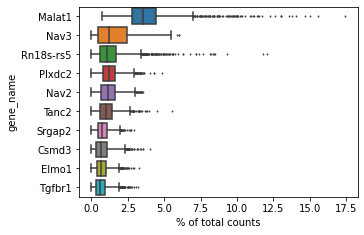

In [12]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.highest_expr_genes(adata, n_top=10, show=False)
    plt.savefig("highest_expr_genes.pdf", bbox_inches="tight")

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

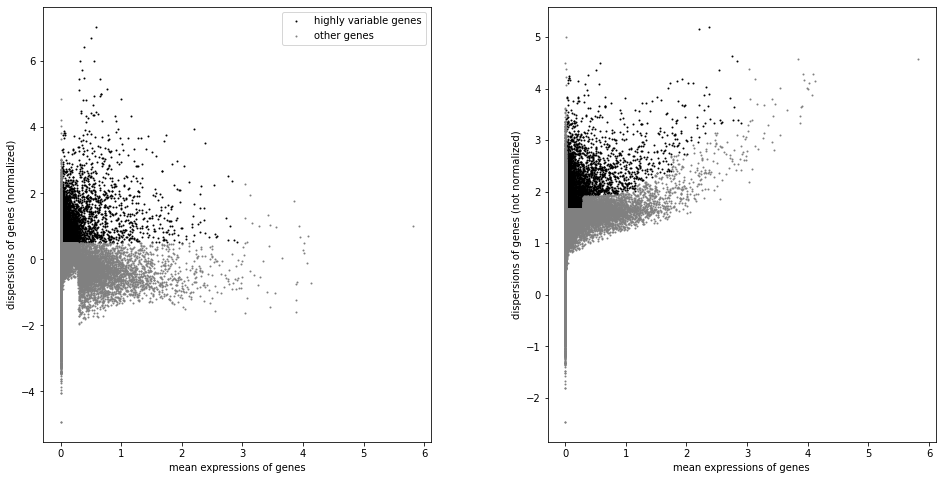

In [27]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.highly_variable_genes(adata, show=False)
    plt.savefig("most_variable_genes.pdf", bbox_inches="tight")

Signature:
sc.pl.highly_variable_genes(
    adata_or_result: Union[anndata._core.anndata.AnnData, pandas.core.frame.DataFrame, numpy.recarray],
    log: bool = False,
    show: Union[bool, NoneType] = None,
    save: Union[bool, str, NoneType] = None,
    highly_variable_genes: bool = True,
)
Docstring:
Plot dispersions or normalized variance versus means for genes.

Produces Supp. Fig. 5c of Zheng et al. (2017) and MeanVarPlot() and
VariableFeaturePlot() of Seurat.

Parameters
----------
adata
    Result of :func:`~scanpy.pp.highly_variable_genes`.
log : bool, optional (default: False)
    Plot on logarithmic axes.
show : typing.Union[bool, NoneType], optional (default: None)
     Show the plot, do not return axis.
save : typing.Union[bool, str, NoneType], optional (default: None)
    If `True` or a `str`, save the figure.
    A string is appended to the default filename.
    Infer the filetype if ending on {{`'.pdf'`, `'.png'`, `'.svg'`}}.
File:      ~/opt/miniconda3/envs/scverse-lit

<Figure size 576x432 with 0 Axes>

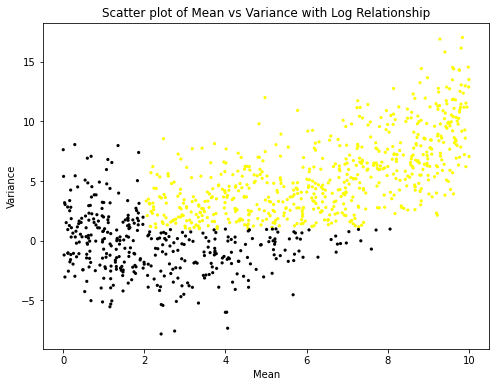

'mean_vs_variance_log.pdf'

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 50 random data points with mean values in the range 0-10 and variance values in the range 0-3
np.random.seed(0)  # to ensure reproducibility
means = np.random.uniform(0, 10, 1000)

# Step 2: Create a scatter plot
plt.figure(figsize=(8, 6))

# Step 3: Highlight the points with high variance and mean above certain thresholds with a light yellow color, rest as white
threshold_mean = 2
threshold_variance = 1

# Step 2: Generate corresponding variance values using a logarithmic function with added noise
a = 0.1
noise_amplitude = 3
noise = np.random.normal(0, noise_amplitude, 1000)
variances = a * (means**2)+ noise

# Step 3: Create a scatter plot
plt.figure(figsize=(8, 6))

# Step 4: Adjusting colors: blue for highlighted points and black for the rest
colors = ['yellow' if (mean > threshold_mean and variance > threshold_variance) else 'black' for mean, variance in zip(means, variances)]

# Scatter plot with circular markers
plt.scatter(means, variances, c=colors, edgecolors='black', s=10, linewidths=0.01)

# Setting labels and title
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Scatter plot of Mean vs Variance with Log Relationship')

# Step 5: Save the plot as an pdf file
pdf_file_path_log = 'mean_vs_variance_log.pdf'
plt.savefig(pdf_file_path_log)

# Show the plot
plt.show()

# Providing the file path for downloading
pdf_file_path_log

In [ ]:
# Step 1: Generate 50 data points with mean values linearly spaced between 0 and 10
means = np.linspace(0, 10, 50)

# Step 2: Generate corresponding variance values using a quadratic function
a = 0.03
variances = a * (means**2)

# Step 3: Create a scatter plot
plt.figure(figsize=(8, 6))

# Step 4: Highlight the points with high variance and mean above certain thresholds with a light yellow color, rest as white
colors = ['lightyellow' if (mean > threshold_mean and variance > threshold_variance) else 'white' for mean, variance in zip(means, variances)]

# Scatter plot with circular markers
plt.scatter(means, variances, c=colors, edgecolors='black')

# Setting labels and title
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Scatter plot of Mean vs Variance')

# Step 5: Save the plot as an SVG file
plt.savefig('/mnt/data/scatter_plot_relationship.svg')

# Show the plot
plt.show()